# Lab 2: Hand Gesture Recognition

This lab is based on an assignment developed by Prof. Lisa Zhang.

This lab will be completed in two parts. In Part A you will gain experience gathering your own data set (specifically images of hand gestures), and understand the challenges involved in the data cleaning process. In Part B you will train a convolutional neural network to make classifications on different hand gestures. By the end of the lab, you should be able to:

1. Generate and preprocess your own data
2. Load and split data for training, validation and testing
3. Train a Convolutional Neural Network
4. Apply transfer learning to improve your model

Note that for this lab we will not be providing you with any starter code. You should be able to take the code used in previous labs, tutorials and lectures and modify it accordingly to complete the tasks outlined below.

### What to submit

**Submission for Part A:**  
Submit a zip file containing your images. Three images each of American Sign Language gestures for letters A - I (total of 27 images). You will be required to clean the images before submitting them. Details are provided under Part A of the handout.

Individual image file names should follow the convention of student-number_Alphabet_file-number.jpg
(e.g. 100343434_A_1.jpg).


**Submission for Part B:**  
Submit an HTML file containing all your code, outputs, and write-up
from parts A and B. You can produce a HTML file directly from Google Colab. The Colab instructions are provided at the end of this document.

**Do not submit any other files produced by your code.**

Include a link to your colab file in your submission.

Please use Google Colab to complete this assignment. If you want to use Jupyter Notebook, please complete the assignment and upload your Jupyter Notebook file to Google Colab for submission. 

## Colab Link

Include a link to your colab file here

Colab Link: https://colab.research.google.com/drive/1qynvP5qJHKRkBk9IieolY0NCS3maWtjo?usp=sharing

# Part A. Data Collection [10 pt]

So far, we have worked with data sets that have been collected, cleaned, and curated by machine learning
researchers and practitioners. Datasets like MNIST and CIFAR are often used as toy examples, both by
students and by researchers testing new machine learning models.

In the real world, getting a clean data set is never that easy. More than half the work in applying machine
learning is finding, gathering, cleaning, and formatting your data set.

The purpose of this lab is to help you gain experience gathering your own data set, and understand the
challenges involved in the data cleaning process.

### American Sign Language

American Sign Language (ASL) is a complete, complex language that employs signs made by moving the
hands combined with facial expressions and postures of the body. It is the primary language of many
North Americans who are deaf and is one of several communication options used by people who are deaf or
hard-of-hearing.

The hand gestures representing English alphabet are shown below. This lab focuses on classifying a subset
of these hand gesture images using convolutional neural networks. Specifically, given an image of a hand
showing one of the letters A-I, we want to detect which letter is being represented.

![alt text](https://www.disabled-world.com/pics/1/asl-alphabet.jpg)


### Generating Data
We will produce the images required for this lab by ourselves. Each student will collect, clean and submit
three images each of Americal Sign Language gestures for letters A - I (total of 27 images)
Steps involved in data collection

1. Familiarize yourself with American Sign Language gestures for letters from A - I (9 letters).
2. Take three pictures at slightly different orientation for each letter gesture using your
mobile phone.
 - Ensure adequate lighting while you are capturing the images.
 - Use a white wall as your background.
 - Use your right hand to create gestures (for consistency).
 - Keep your right hand fairly apart from your body and any other obstructions.
 - Avoid having shadows on parts of your hand.
3. Transfer the images to your laptop for cleaning.

### Cleaning Data
To simplify the machine learning the task, we will standardize the training images. We will make sure that
all our images are of the same size (224 x 224 pixels RGB), and have the hand in the center of the cropped
regions.

You may use the following applications to crop and resize your images:

**Mac**
- Use Preview:
– Holding down CMD + Shift will keep a square aspect ratio while selecting the hand area.
– Resize to 224x224 pixels.

**Windows 10**
- Use Photos app to edit and crop the image and keep the aspect ratio a square.
- Use Paint to resize the image to the final image size of 224x224 pixels.

**Linux**
- You can use GIMP, imagemagick, or other tools of your choosing.
You may also use online tools such as http://picresize.com
All the above steps are illustrative only. You need not follow these steps but following these will ensure that
you produce a good quality dataset. You will be judged based on the quality of the images alone.
Please do not edit your photos in any other way. You should not need to change the aspect ratio of your
image. You also should not digitally remove the background or shadows—instead, take photos with a white
background and minimal shadows.

### Accepted Images
Images will be accepted and graded based on the criteria below
1. The final image should be size 224x224 pixels (RGB).
2. The file format should be a .jpg file.
3. The hand should be approximately centered on the frame.
4. The hand should not be obscured or cut off.
5. The photos follows the ASL gestures posted earlier.
6. The photos were not edited in any other way (e.g. no electronic removal of shadows or background).

### Submission
Submit a zip file containing your images. There should be a total of 27 images (3 for each category)
1. Individual image file names should follow the convention of student-number_Alphabet_file-number.jpg
(e.g. 100343434_A_1.jpg)
2. Zip all the images together and name it with the following convention: last-name_student-number.zip
(e.g. last-name_100343434.zip).
3. Submit the zipped folder.
We will be anonymizing and combining the images that everyone submits. We will announce when the
combined data set will be available for download.

![alt text](https://github.com/UTNeural/APS360/blob/master/Gesture%20Images.PNG?raw=true)

# Part B. Building a CNN [40 pt]

For this lab, we are not going to give you any starter code. You will be writing a convolutional neural network
from scratch. You are welcome to use any code from previous labs, lectures and tutorials. You should also
write your own code.

You may use the PyTorch documentation freely. You might also find online tutorials helpful. However, all
code that you submit must be your own.

Make sure that your code is vectorized, and does not contain obvious inefficiencies (for example, unecessary
for loops, or unnecessary calls to unsqueeze()). Ensure enough comments are included in the code so that
your TA can understand what you are doing. It is your responsibility to show that you understand what you
write.

**This is much more challenging and time-consuming than the previous labs.** Make sure that you
give yourself plenty of time by starting early.

### Part 1. Data Loading and Splitting [5 pt]

Download the anonymized data provided on Quercus. Split the data into training, validation, and test sets.

Note: Data splitting is not as trivial in this lab. We want our test set to closely resemble the setting in which
our model will be used. In particular, our test set should contain hands that are never seen in training!

Explain how you split the data, either by describing what you did, or by showing the code that you used.
Justify your choice of splitting strategy. How many training, validation, and test images do you have?

For loading the data, you can use plt.imread, or any other method that you choose. You may find
torchvision.datasets.ImageFolder helpful. (see https://pytorch.org/docs/master/torchvision/datasets.html#imagefolder
) 

In [ ]:
pip install split-folders

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
import splitfolders
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import torch.optim as optim 
from torchvision.datasets import ImageFolder
from torch.utils.data.sampler import SubsetRandomSampler

#### Data loading

In [ ]:
#connect to drive
#from google.colab import drive
#drive.mount('/content/gdrive')

In [ ]:
# The output of torchvision datasets are PILImage images of range [0, 1].
# We transform them to Tensors of normalized range [-1, 1].
transform = transforms.Compose(
    [transforms.ToTensor(),
      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),transforms.Resize([224, 224])])

In [ ]:
#load folder from drive
dataset = ImageFolder('Lab_3b_Gesture_Dataset',transform=transform)

In [ ]:
#preview of dataset
print(dataset)

Dataset ImageFolder
    Number of datapoints: 2431
    Root location: Lab_3b_Gesture_Dataset
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
               Resize(size=[224, 224], interpolation=bilinear, max_size=None, antialias=None)
           )


In [ ]:
#class-label dictionary 
print(dataset.class_to_idx)

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8}


#### Data Splitting

Because there are 102 people in each class, each has three images of hands. I split the dataset into train_val dataset and test dataset with percentages of 85% and 15% respectively. So 1-87 people will be counted in the train_val dataset and 88-102 people will be counted in the test dataset. This split is done manually from the windows folder.

In [ ]:
#Train and validation dataset
train_val_dataset = ImageFolder('Lab_3b_Gesture_Dataset_Train_Val',transform=transform)

In [ ]:
train_val_dataset

Dataset ImageFolder
    Number of datapoints: 2104
    Root location: Lab_3b_Gesture_Dataset_Train_Val
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
               Resize(size=[224, 224], interpolation=bilinear, max_size=None, antialias=None)
           )

In [ ]:
#test dataset
test_dataset = ImageFolder('Lab_3b_Gesture_Dataset_Test',transform=transform)

In [ ]:
test_dataset

Dataset ImageFolder
    Number of datapoints: 369
    Root location: Lab_3b_Gesture_Dataset_Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
               Resize(size=[224, 224], interpolation=bilinear, max_size=None, antialias=None)
           )

In [ ]:
# function to split train and validation, then change to loader
def train_val_splitting(dataset,batch_size):
    #get total number of indices
    total_indices = list(range(0,len(dataset)))

    #shuffle dataset indices with special seed
    np.random.seed(1000) # Fixed numpy random seed for reproducible shuffling
    np.random.shuffle(total_indices)

    #get the split position() # split at 85% of the dataset
    split_train_val = int(len(total_indices) *0.85) # split position between train & validation

    #get split indeices for train/validation/test
    train_indices = total_indices[0:split_train_val]
    val_indices = total_indices[split_train_val:len(total_indices)] 

    # split into training, validation, and test 
    train_sampler = SubsetRandomSampler(train_indices)
    train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                                num_workers=1,pin_memory = True,sampler=train_sampler)
    val_sampler = SubsetRandomSampler(val_indices)
    val_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                              num_workers=1,pin_memory = True, sampler=val_sampler)
    return train_loader, val_loader

In [ ]:
#get test loader
def test_loading(testdata,batch_size):
    test_loader = torch.utils.data.DataLoader(testdata, batch_size=batch_size,num_workers=1,pin_memory = True)
    return test_loader

In [ ]:
train_loader, val_loader, = train_val_splitting(train_val_dataset,batch_size=1)
test_loader  = test_loading(test_dataset,batch_size=1)

In [ ]:
len(train_loader),len(val_loader),len(test_loader)

(1788, 316, 369)

My split strategy is to first split the dataset into train_val dataset and test dataset. Then use the function to shuffle and split into training and validation.

There are 1788 images for training, 316 images for validation, and 369 images for testing.

### Part 2. Model Building and Sanity Checking [9 pt]

### Part (a) Convolutional Network - 3 pt

Build a convolutional neural network model that takes the (224x224 RGB) image as input, and predicts the gesture
letter. Your model should be a subclass of nn.Module. Explain your choice of neural network architecture: how
many layers did you choose? What types of layers did you use? Were they fully-connected or convolutional?
What about other decisions like pooling layers, activation functions, number of channels / hidden units?

In [ ]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.name = "ConvNet1"
        self.conv1 = nn.Conv2d(3, 5, 11, 3)
        self.pool1 = nn.MaxPool2d(3, 3) 
        self.conv2 = nn.Conv2d(5, 10, 7) 
        self.pool2 = nn.MaxPool2d(2, 2) 
        self.fc1 = nn.Linear(10*9*9, 81)
        self.fc2 = nn.Linear(81, 9)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = x.view(-1, 10*9*9)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = x.squeeze(1) # Flatten to [batch_size]
        return x

In [ ]:
for param in ConvNet().parameters():
    print(param.shape)

torch.Size([5, 3, 11, 11])
torch.Size([5])
torch.Size([10, 5, 7, 7])
torch.Size([10])
torch.Size([81, 810])
torch.Size([81])
torch.Size([9, 81])
torch.Size([9])


In the ConvNet, there are six layers. 

The first layer is a convolutional layer with 3 input channels, 5 output channels, kernel size is 11, no padding,and stride is 3. Not a fully-connected layer. After first convolution layer, I use the ReLU function to change negative number to 0. 

The second layer is a pooling layer with kernel size 3 and stride 3. Not a fully-connected layer.

The third layer is a second convolution layer with 5 input channels, 10 output layers, kernel size is 7, no padding,and stride is 1.Not a fully-connected layer. After second convolution layer, I use the ReLU function to change negative number to 0.

The forth layer is a second pooling layer with kernel size 2 and stride 2. Not a fully-connected layer.

The fifth layer is a fully-connected layer with 810 input channels and 81 output channels.

The sixth layer is a fully-connected layer with 81 input channels and 9 output channels.

### Part (b) Training Code - 3 pt

Write code that trains your neural network given some training data. Your training code should make it easy
to tweak the usual hyperparameters, like batch size, learning rate, and the model object itself. Make sure
that you are checkpointing your models from time to time (the frequency is up to you). Explain your choice
of loss function and optimizer.

In [ ]:
def get_accuracy(model, loader):
    correct = 0
    total = 0
    for imgs, labels in iter(loader): 
        #############################################
        #To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
            imgs = imgs.cuda()
            labels = labels.cuda()
        #############################################            
        output = model(imgs)
        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

In [ ]:
def train(model, dataset, batch_size=64, learning_rate=0.01, num_epochs=30, curve_name='curve0'):
    # Fixed PyTorch random seed for reproducible result
    torch.manual_seed(1000)
    # Obtain the PyTorch data loader objects to load batches of the datasets
    train_loader, val_loader = train_val_splitting(dataset,batch_size)
    train_loader, val_loader = list(train_loader),list(val_loader)
    # Define the Loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
    # Set up some empty list
    iters, train_losses, train_acc, val_acc = [], [], [], []

    # Training
#   start_time = time.time()
    n = 0 # the number of iterations
    start_time = time.time()
    for epoch in range(num_epochs):
        #initial
        acc_t = []
        acc_v = []        
        for imgs, labels in iter(train_loader): 

            #####################################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
                imgs = imgs.cuda()
                labels = labels.cuda()
            ######################################################           
            output = model(imgs)             # forward pass
            loss = criterion(output, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch

            # save the current training information
            iters.append(n)
            train_losses.append(float(loss)/batch_size)             # compute *average* losse)
            train_acc.append(get_accuracy(model, train_loader)) # compute training accuracy
            val_acc.append(get_accuracy(model, val_loader))  # compute validation accuracy
            acc_t.append(get_accuracy(model, train_loader))
            acc_v.append(get_accuracy(model, val_loader))
            n += 1
            

            
        #Statistics
        print(("Epoch {}: Train accuracy: {} |"+
               "Validation accuracy: {}").format(
                   epoch + 1,
                   sum(acc_t)/len(acc_t),
                   sum(acc_v)/len(acc_v)))
     
        # Save the current model (checkpoint) to a file
        model_path = "model_{0}_curvename_{1}_epoch{2}".format(model.name,curve_name,epoch)
        torch.save(model.state_dict(), model_path)
    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Total time elapsed: {:.2f} seconds".format(elapsed_time))


    # plotting
    plt.title("Training Curve")
    plt.plot(iters, train_losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
    plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))

The dataset has 9 classes which need to use nn.CrossEntropyLoss() as our loss function. This loss function in PyTorch takes care of the softmax function to avoid numerical instability.

The optimizer uses SGD. Stochastic gradient algorithm can converge faster and it is not easy to be trapped in the optimal which is more possible to find the global optimal.

### Part (c) “Overfit” to a Small Dataset - 3 pt

One way to sanity check our neural network model and training code is to check whether the model is capable
of “overfitting” or “memorizing” a small dataset. A properly constructed CNN with correct training code
should be able to memorize the answers to a small number of images quickly.

Construct a small dataset (e.g. just the images that you have collected). Then show that your model and
training code is capable of memorizing the labels of this small data set.

With a large batch size (e.g. the entire small dataset) and learning rate that is not too high, You should be
able to obtain a 100% training accuracy on that small dataset relatively quickly (within 200 iterations).

In [ ]:
small_data = ImageFolder('li_1007508724',transform=transform)

Epoch 1: Train accuracy: 0.13636363636363635 |Validation accuracy: 0.0
Epoch 2: Train accuracy: 0.13636363636363635 |Validation accuracy: 0.0
Epoch 3: Train accuracy: 0.13636363636363635 |Validation accuracy: 0.0
Epoch 4: Train accuracy: 0.13636363636363635 |Validation accuracy: 0.0
Epoch 5: Train accuracy: 0.13636363636363635 |Validation accuracy: 0.0
Epoch 6: Train accuracy: 0.13636363636363635 |Validation accuracy: 0.0
Epoch 7: Train accuracy: 0.13636363636363635 |Validation accuracy: 0.0
Epoch 8: Train accuracy: 0.13636363636363635 |Validation accuracy: 0.0
Epoch 9: Train accuracy: 0.13636363636363635 |Validation accuracy: 0.0
Epoch 10: Train accuracy: 0.13636363636363635 |Validation accuracy: 0.0
Epoch 11: Train accuracy: 0.13636363636363635 |Validation accuracy: 0.0
Epoch 12: Train accuracy: 0.13636363636363635 |Validation accuracy: 0.0
Epoch 13: Train accuracy: 0.13636363636363635 |Validation accuracy: 0.0
Epoch 14: Train accuracy: 0.13636363636363635 |Validation accuracy: 0.0
E

Epoch 132: Train accuracy: 1.0 |Validation accuracy: 1.0
Epoch 133: Train accuracy: 1.0 |Validation accuracy: 1.0
Epoch 134: Train accuracy: 1.0 |Validation accuracy: 1.0
Epoch 135: Train accuracy: 1.0 |Validation accuracy: 1.0
Epoch 136: Train accuracy: 1.0 |Validation accuracy: 1.0
Epoch 137: Train accuracy: 1.0 |Validation accuracy: 1.0
Epoch 138: Train accuracy: 1.0 |Validation accuracy: 1.0
Epoch 139: Train accuracy: 1.0 |Validation accuracy: 1.0
Epoch 140: Train accuracy: 1.0 |Validation accuracy: 1.0
Epoch 141: Train accuracy: 1.0 |Validation accuracy: 1.0
Epoch 142: Train accuracy: 1.0 |Validation accuracy: 1.0
Epoch 143: Train accuracy: 1.0 |Validation accuracy: 1.0
Epoch 144: Train accuracy: 1.0 |Validation accuracy: 1.0
Epoch 145: Train accuracy: 1.0 |Validation accuracy: 1.0
Epoch 146: Train accuracy: 1.0 |Validation accuracy: 1.0
Epoch 147: Train accuracy: 1.0 |Validation accuracy: 1.0
Epoch 148: Train accuracy: 1.0 |Validation accuracy: 1.0
Epoch 149: Train accuracy: 1.0 

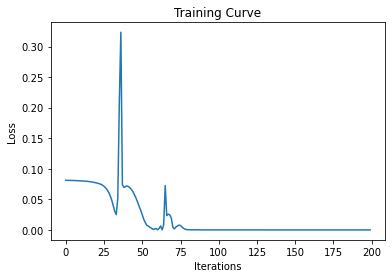

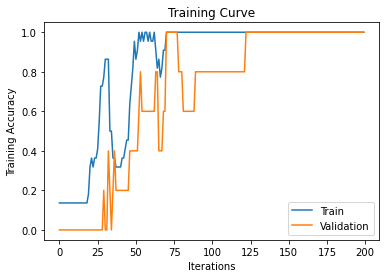

Final Training Accuracy: 1.0
Final Validation Accuracy: 1.0


In [ ]:
use_cuda=True
model = ConvNet()
train(model.cuda(),small_data, batch_size=27,learning_rate=0.01,num_epochs=200)

### Part 3. Hyperparameter Search [8 pt]

### Part (a) - 2 pt

List 3 hyperparameters that you think are most worth tuning. Choose at least one hyperparameter related to
the model architecture.

 (1)Number of channels

 (2)Number of Layers
 
 (3)Batch size

### Part (b) - 2 pt

Tune the hyperparameters you listed in Part (a), trying as many values as you need to until you feel satisfied
that you are getting a good model. Plot the training curve of at least 4 different hyperparameter settings.

CUDA is available!  Training on GPU ...
Epoch 1: Train accuracy: 0.1659039572882748 |Validation accuracy: 0.1462847654628477
Epoch 2: Train accuracy: 0.40595206664906575 |Validation accuracy: 0.40149439601494397
Epoch 3: Train accuracy: 0.6249083281997124 |Validation accuracy: 0.5907015359070156
Epoch 4: Train accuracy: 0.7170494881046672 |Validation accuracy: 0.6714819427148193
Epoch 5: Train accuracy: 0.7852679750066003 |Validation accuracy: 0.719634703196347
Epoch 6: Train accuracy: 0.8359588136935667 |Validation accuracy: 0.7510170195101702
Epoch 7: Train accuracy: 0.8579307107864707 |Validation accuracy: 0.7584059775840597
Epoch 8: Train accuracy: 0.8614509079175101 |Validation accuracy: 0.7628061436280614
Epoch 9: Train accuracy: 0.8842881868051276 |Validation accuracy: 0.7658779576587798
Epoch 10: Train accuracy: 0.9049106749977999 |Validation accuracy: 0.7794935657949356
Finished Training
Total time elapsed: 222.68 seconds


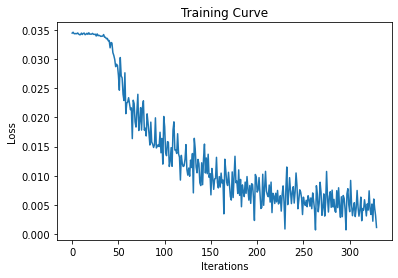

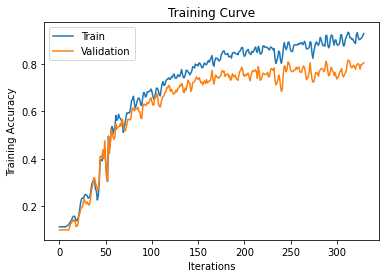

Final Training Accuracy: 0.9283639883833494
Final Validation Accuracy: 0.8054794520547945


In [ ]:
#Original model 
use_cuda = True
model = ConvNet()
if use_cuda and torch.cuda.is_available():
    model.cuda()
    print('CUDA is available!  Training on GPU ...')
else:
    print('CUDA is not available.  Training on CPU ...')
#proper model
train(model, dataset, num_epochs=10,curve_name = 'curve0')

In [ ]:
class ConvNet_2(nn.Module): #increase channels
    def __init__(self):
        super(ConvNet_2, self).__init__()
        self.name = "ConvNet2"
        self.conv1 = nn.Conv2d(3, 7, 11, 3)#in_channels, out_chanels, kernel_size, stride_size
        self.pool1 = nn.MaxPool2d(3, 3) #kernel_size, stride
        self.conv2 = nn.Conv2d(7, 30, 7) #in_channels, out_chanels, kernel_size
        self.pool2 = nn.MaxPool2d(2, 2) #kernel_size, stride 
        self.fc1 = nn.Linear(30*9*9, 81)
        self.fc2 = nn.Linear(81, 9)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = x.view(-1, 30*9*9)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = x.squeeze(1) # Flatten to [batch_size]
        return x

CUDA is available!  Training on GPU ...
Epoch 1: Train accuracy: 0.24113350347619467 |Validation accuracy: 0.21295143212951428
Epoch 2: Train accuracy: 0.5248027222857815 |Validation accuracy: 0.5095890410958905
Epoch 3: Train accuracy: 0.6998445246267124 |Validation accuracy: 0.6763802407638024
Epoch 4: Train accuracy: 0.7774355363900379 |Validation accuracy: 0.7347447073474469
Epoch 5: Train accuracy: 0.8237701311273432 |Validation accuracy: 0.7628061436280614
Epoch 6: Train accuracy: 0.866379183900965 |Validation accuracy: 0.7882108758821088
Epoch 7: Train accuracy: 0.8972542462377894 |Validation accuracy: 0.8107928601079285
Epoch 8: Train accuracy: 0.9044266478922821 |Validation accuracy: 0.8009132420091323
Epoch 9: Train accuracy: 0.9228783478541467 |Validation accuracy: 0.8091324200913245
Epoch 10: Train accuracy: 0.9162193082812637 |Validation accuracy: 0.8036529680365295
Finished Training
Total time elapsed: 226.80 seconds


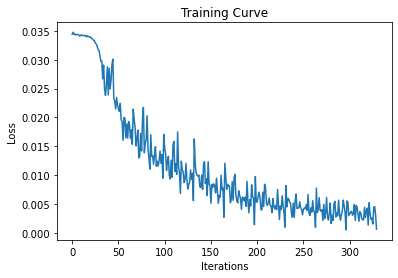

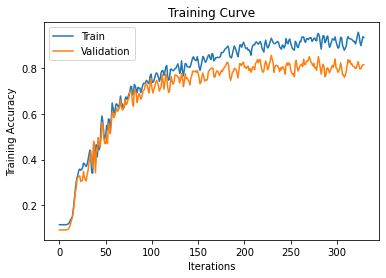

Final Training Accuracy: 0.9327202323330106
Final Validation Accuracy: 0.8136986301369863


In [ ]:
#try 1: increase out_channels of conv 1&2 layers
model = ConvNet_2()
if use_cuda and torch.cuda.is_available():
    model.cuda()
    print('CUDA is available!  Training on GPU ...')
else:
    print('CUDA is not available.  Training on CPU ...')
train(model.cuda(), dataset, batch_size=64, learning_rate=0.01, num_epochs=10,curve_name ='try1')

In [ ]:
class ConvNet_3(nn.Module): #increase layer
    def __init__(self):
        super(ConvNet_3, self).__init__()
        self.name = "ConvNet3"   
        self.conv1 = nn.Conv2d(3, 5, 11, 3)#in_channels, out_chanels, kernel_size, stride_size
        self.pool1 = nn.MaxPool2d(3, 3) #kernel_size, stride
        self.conv2 = nn.Conv2d(5, 7, 7) #in_channels, out_chanels, kernel_size
        self.pool2 = nn.MaxPool2d(2, 2) #kernel_size, stride 
        self.conv3 = nn.Conv2d(7,10,5) #in_channels, out_chanels, kernel_size
        self.fc1 = nn.Linear(10*5*5, 81)
        self.fc2 = nn.Linear(81, 9)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = F.relu(self.conv3(x))
        x = x.view(-1, 10*5*5)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = x.squeeze(1) # Flatten to [batch_size]
        return x

CUDA is available!  Training on GPU ...
Epoch 1: Train accuracy: 0.11326234269119072 |Validation accuracy: 0.10684931506849309
Epoch 2: Train accuracy: 0.11326234269119072 |Validation accuracy: 0.10684931506849309
Epoch 3: Train accuracy: 0.18195018921059578 |Validation accuracy: 0.15732669157326695
Epoch 4: Train accuracy: 0.3281703775411423 |Validation accuracy: 0.2891656288916564
Epoch 5: Train accuracy: 0.5491654199301828 |Validation accuracy: 0.5222083852220838
Epoch 6: Train accuracy: 0.6678547331983923 |Validation accuracy: 0.6311332503113324
Epoch 7: Train accuracy: 0.7219924315761682 |Validation accuracy: 0.6753009547530096
Epoch 8: Train accuracy: 0.7594825310217372 |Validation accuracy: 0.7004566210045662
Epoch 9: Train accuracy: 0.7893162017072957 |Validation accuracy: 0.7210460772104607
Epoch 10: Train accuracy: 0.8135322244712369 |Validation accuracy: 0.7364881693648815
Finished Training
Total time elapsed: 233.54 seconds


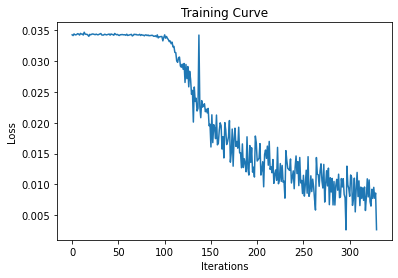

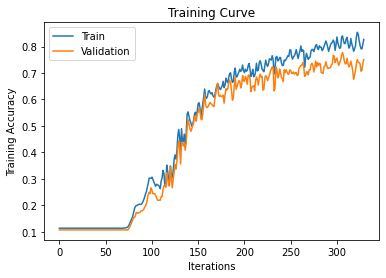

Final Training Accuracy: 0.8272023233301065
Final Validation Accuracy: 0.7506849315068493


In [ ]:
#try 2: increase one convolutional layer(conv3)
model = ConvNet_3()
if use_cuda and torch.cuda.is_available():
    model.cuda()
    print('CUDA is available!  Training on GPU ...')
else:
    print('CUDA is not available.  Training on CPU ...')
train(model.cuda(), dataset, batch_size=64, learning_rate=0.01, num_epochs=10,curve_name ='try2')

CUDA is available!  Training on GPU ...
Epoch 1: Train accuracy: 0.3800990393923597 |Validation accuracy: 0.36861959957850376
Epoch 2: Train accuracy: 0.6852408965671309 |Validation accuracy: 0.6494415173867228
Epoch 3: Train accuracy: 0.7599597885173878 |Validation accuracy: 0.7089778714436253
Epoch 4: Train accuracy: 0.7875158239630646 |Validation accuracy: 0.7302212855637514
Epoch 5: Train accuracy: 0.8171382828207613 |Validation accuracy: 0.7432665964172815
Epoch 6: Train accuracy: 0.8380072976394374 |Validation accuracy: 0.7607586933614331
Epoch 7: Train accuracy: 0.8769900960607641 |Validation accuracy: 0.789525816649105
Epoch 8: Train accuracy: 0.8904534961650156 |Validation accuracy: 0.7914014752370913
Epoch 9: Train accuracy: 0.9137351999404274 |Validation accuracy: 0.7964805057955744
Epoch 10: Train accuracy: 0.9195398019212155 |Validation accuracy: 0.8004847207586939
Finished Training
Total time elapsed: 1079.78 seconds


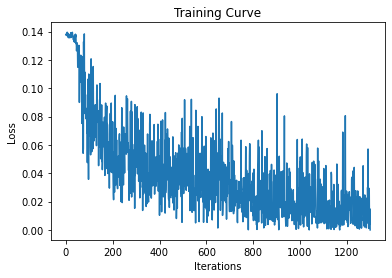

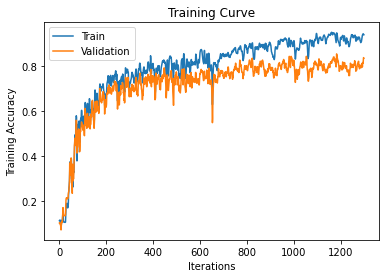

Final Training Accuracy: 0.9365924491771539
Final Validation Accuracy: 0.8328767123287671


In [ ]:
#try 3: decrease batch size
model = ConvNet()
if use_cuda and torch.cuda.is_available():
    model.cuda()
    print('CUDA is available!  Training on GPU ...')
else:
    print('CUDA is not available.  Training on CPU ...')
train(model.cuda(), dataset, batch_size=16, learning_rate=0.01, num_epochs=10,curve_name ='try3')

CUDA is available!  Training on GPU ...
Epoch 1: Train accuracy: 0.371047732519175 |Validation accuracy: 0.36084299262381464
Epoch 2: Train accuracy: 0.6795256534365923 |Validation accuracy: 0.647123287671233
Epoch 3: Train accuracy: 0.7807245513441061 |Validation accuracy: 0.7245943097997894
Epoch 4: Train accuracy: 0.8428959714051679 |Validation accuracy: 0.7677344573234985
Epoch 5: Train accuracy: 0.8654665276640109 |Validation accuracy: 0.7884931506849318
Epoch 6: Train accuracy: 0.9008228460793808 |Validation accuracy: 0.8077344573234984
Epoch 7: Train accuracy: 0.9055216322883308 |Validation accuracy: 0.8141833508956794
Epoch 8: Train accuracy: 0.9117395189515232 |Validation accuracy: 0.8093361433087461
Epoch 9: Train accuracy: 0.9221423784347309 |Validation accuracy: 0.8267439409905164
Epoch 10: Train accuracy: 0.9349653734455278 |Validation accuracy: 0.8227818756585876
Epoch 11: Train accuracy: 0.9235758433241489 |Validation accuracy: 0.8178292939936778
Epoch 12: Train accuracy

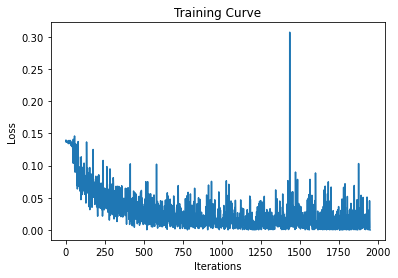

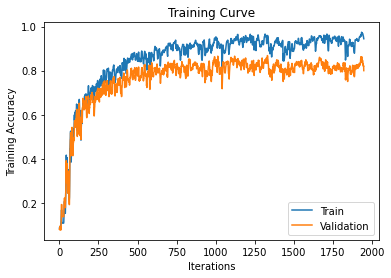

Final Training Accuracy: 0.9448209099709584
Final Validation Accuracy: 0.8


In [ ]:
#try 4: Best model
use_cuda = True
model = ConvNet_2()

if use_cuda and torch.cuda.is_available():
    model.cuda()
    print('CUDA is available!  Training on GPU ...')
else:
    print('CUDA is not available.  Training on CPU ...')
train(model, dataset, batch_size=16, learning_rate=0.01, num_epochs=15,curve_name ='try4')

### Part (c) - 2 pt
Choose the best model out of all the ones that you have trained. Justify your choice.

I gain 5 training curves by tune hyperparameters. 

The first train use the model built in part2(b), the batch_size and learning rate are original setting which are 64 and 0.01. The finally train accuracy is 0.92 and the final validation accuracy is 0.80.

The second curve is the first try of tuning hyperparameters. In this training, I try a second model which increase the output channels of both conv1 and conv2 layers. The finally train accuracy is 0.93 and the final validation accuracy is 0.81. Thus, I can get the result that the increase of output channels can help improve the model. 

In the third curve, I built the third model which increase the numbers of layer. This model add a new convolution_3 layer before the fully-connected layers.  The finally train accuracy is 0.83 and the final validation accuracy is 0.75. The accuracies are both lower than the original model hence I will not choose this model as my best model and in this dataset increase the model layer will decrease the model accuracy. 

In the fourth curve I try to know the effect of decrease the batch size, so I use the origin model and set the batch size as 16. The finally train accuracy is 0.93 and the final validation accuracy is 0.83. Thus, decrease batch size can improve the model accuracy.

The last curve I try to use the second model and decrease the batch size which are both improve the model separately.  The finally train accuracy is 0.94 and the final validation accuracy is 0.8. The train accuracy is increase but the validation accuracy is decreased with means this model is a little overfitting.

Best model(try3):
model = ConvNet(), 
batch_size=16, 
learning_rate=0.01, 
num_epochs=10

In [ ]:
best_model = ConvNet()
state = torch.load('model_ConvNet1_curvename_try3_epoch9')
best_model.load_state_dict(state)

<All keys matched successfully>

### Part (d) - 2 pt
Report the test accuracy of your best model. You should only do this step once and prior to this step you should have only used the training and validation data.

In [ ]:
test_loader  = test_loading(test_dataset,batch_size=16)

In [ ]:
use_cuda = True
test_accuracy = get_accuracy(best_model.cuda(),test_loader)
print('Test accuracy of best model is:', test_accuracy)

Test accuracy of best model is: 0.94579945799458


### Part 4. Transfer Learning [8 pt]
For many image classification tasks, it is generally not a good idea to train a very large deep neural network
model from scratch due to the enormous compute requirements and lack of sufficient amounts of training
data.

One of the better options is to try using an existing model that performs a similar task to the one you need
to solve. This method of utilizing a pre-trained network for other similar tasks is broadly termed **Transfer
Learning**. In this assignment, we will use Transfer Learning to extract features from the hand gesture
images. Then, train a smaller network to use these features as input and classify the hand gestures.

As you have learned from the CNN lecture, convolution layers extract various features from the images which
get utilized by the fully connected layers for correct classification. AlexNet architecture played a pivotal
role in establishing Deep Neural Nets as a go-to tool for image classification problems and we will use an
ImageNet pre-trained AlexNet model to extract features in this assignment.

### Part (a) - 2 pt
Here is the code to load the AlexNet network, with pretrained weights. When you first run the code, PyTorch
will download the pretrained weights from the internet.

In [ ]:
import torchvision.models
alexnet = torchvision.models.alexnet(pretrained=True)

The alexnet model is split up into two components: *alexnet.features* and *alexnet.classifier*. The
first neural network component, *alexnet.features*, is used to compute convolutional features, which are
taken as input in *alexnet.classifier*.

The neural network alexnet.features expects an image tensor of shape Nx3x224x224 as input and it will
output a tensor of shape Nx256x6x6 . (N = batch size).

Compute the AlexNet features for each of your training, validation, and test data. Here is an example code
snippet showing how you can compute the AlexNet features for some images (your actual code might be
different):

In [ ]:
# img = ... a PyTorch tensor with shape [N,3,224,224] containing hand images ...
#features = alexnet.features(img)

**Save the computed features**. You will be using these features as input to your neural network in Part
(b), and you do not want to re-compute the features every time. Instead, run *alexnet.features* once for
each image, and save the result.

In [ ]:
def get_features(loader):
    torch.manual_seed(1000) # set the random seed
    features,labels=[],[]
    for img, label in iter(loader):
        feature = alexnet.features(img)
        features.append(torch.from_numpy(feature.detach().numpy()))
        labels.append(label)
    return features, labels

In [ ]:
batch_size = 32
dataset = ImageFolder('Lab_3b_Gesture_Dataset',transform=transform)
train_loader, val_loader = train_val_splitting(dataset,batch_size=batch_size)
test_loader  = test_loading(test_dataset,batch_size=32)

In [ ]:
train_features,train_labels = get_features(train_loader)
val_features,val_labels = get_features(val_loader)
test_features,test_features = get_features(test_loader)

### Part (b) - 2 pt
Build a convolutional neural network model that takes as input these AlexNet features, and makes a
prediction. Your model should be a subclass of nn.Module.

Explain your choice of neural network architecture: how many layers did you choose? What types of layers
did you use: fully-connected or convolutional? What about other decisions like pooling layers, activation
functions, number of channels / hidden units in each layer?

Here is an example of how your model may be called:

In [ ]:
#features = ... load precomputed alexnet.features(img) ...
#output = model(features)
#prob = F.softmax(output)

In [ ]:
class Feature_Net(nn.Module): #decrease channels
    def __init__(self):
        super(Feature_Net, self).__init__()
        self.name = "Feature_Net"
        self.fc1 = nn.Linear(256*6*6, 100)
        self.fc2 = nn.Linear(100, 9)

    def forward(self, x):
        x = x.view(-1, 256*6*6)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
for param in Feature_Net().parameters():
    print(param.shape)

torch.Size([100, 9216])
torch.Size([100])
torch.Size([9, 100])
torch.Size([9])


The CNN model has 2 layers.

The first layer is a fully-connected layer which has 9216(256*6*6) input channels and 100 output channels. After the fisrt fully-connected layer I use a ReLU function to avoid negative pixels.

The second layer is also a fully-connected layer which has 100 input channels and 9 output channels.

Since the AlexNet already preprocesses the features, there is no need for the neural network for classification to use convolutional layers.

### Part (c) - 2 pt
Train your new network, including any hyperparameter tuning. Plot and submit the training curve of your
best model only.

Note: Depending on how you are caching (saving) your AlexNet features, PyTorch might still be tracking
updates to the **AlexNet weights**, which we are not tuning. One workaround is to convert your AlexNet
feature tensor into a numpy array, and then back into a PyTorch tensor.

In [ ]:
def get_accuracy2(model, loader, features, labels):
    correct = 0
    total = 0
    for imgs, labels in zip(features,labels):
        
        #############################################
        #To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
            imgs = imgs.cuda()
            labels = labels.cuda()
        ############################################# 
        
        output = model(imgs)
        #prob = F.softmax(output,dim=1)
        
        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
        
    return correct / total

In [ ]:
def train2(model, dataset, batch_size, learning_rate, num_epochs, curve_name='fea_0'):
    # Fixed PyTorch random seed for reproducible result
    torch.manual_seed(1000)
    
    # Obtain the PyTorch data loader objects to load batches of the datasets
    train_loader, val_loader = train_val_splitting(dataset,batch_size)
                                                           
    # Obtain features 
    train_features,train_labels = get_features(train_loader)
    val_features,val_labels = get_features(val_loader)
    #test_features,test_labels = get_features(test_loader)
                                                           
    # change loader to list
    #train_loader, val_loader = list(train_loader),list(val_loader)

    # Define the Loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
                                                           
    # Set up some empty list
    iters, losses, train_acc, val_acc = [], [], [], []
                                                           
    # Training
    n = 0 # the number of iterations
    start_time = time.time()
    for epoch in range(num_epochs):
        #initial
        acc_t = []
        acc_v = []   
        for imgs, labels in zip(train_features,train_labels):
                                                           
            #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
                imgs = imgs.cuda()
                labels = labels.cuda()
            #############################################
                                                           
            out = model(imgs)             # forward pass
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch

            # save the current training information
            iters.append(n)
            losses.append(float(loss)/batch_size)             # compute *average* loss
            train_acc.append(get_accuracy2(model, train_loader, train_features, train_labels)) # compute training accuracy
            val_acc.append(get_accuracy2(model, val_loader, val_features, val_labels))  # compute validation accuracy
            acc_t.append(get_accuracy2(model, train_loader, train_features, train_labels))
            acc_v.append(get_accuracy2(model, val_loader, val_features, val_labels))
            n += 1
        
        #Statistics
        print(("Epoch {}: Train accuracy: {} |"+
               "Validation accuracy: {}").format(
                   epoch + 1,
                   sum(acc_t)/len(acc_t),
                   sum(acc_v)/len(acc_v)))
     
        # Save the current model (checkpoint) to a file
        model_path = "model_{0}_curvename_{1}_epoch{2}".format(model.name,curve_name,epoch)
        torch.save(model.state_dict(), model_path)
    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Total time elapsed: {:.2f} seconds".format(elapsed_time))


    # plotting
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
    plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))

CUDA is available!  Training on GPU ...
Epoch 1: Train accuracy: 0.7521408891205599 |Validation accuracy: 0.7217702845100106
Epoch 2: Train accuracy: 0.910023084369648 |Validation accuracy: 0.8641095890410959
Epoch 3: Train accuracy: 0.9183632437262641 |Validation accuracy: 0.869336143308746
Epoch 4: Train accuracy: 0.9582396306500861 |Validation accuracy: 0.9021707060063221
Epoch 5: Train accuracy: 0.974860376796485 |Validation accuracy: 0.9163329820864066
Epoch 6: Train accuracy: 0.9649936704147736 |Validation accuracy: 0.9040252897787144
Epoch 7: Train accuracy: 0.9779358105592375 |Validation accuracy: 0.9173867228661745
Epoch 8: Train accuracy: 0.9835430784123912 |Validation accuracy: 0.919536354056902
Epoch 9: Train accuracy: 0.9793134261672498 |Validation accuracy: 0.9158271865121179
Epoch 10: Train accuracy: 0.9641596544791123 |Validation accuracy: 0.9001896733403583
Epoch 11: Train accuracy: 0.9892248119740864 |Validation accuracy: 0.9259852476290831
Epoch 12: Train accuracy: 0

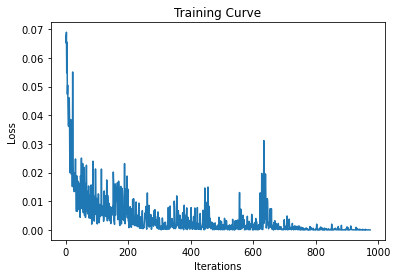

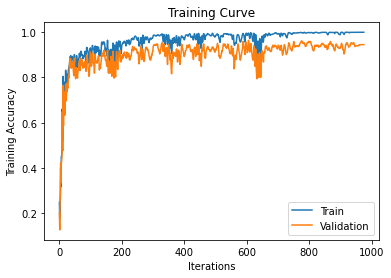

Final Training Accuracy: 1.0
Final Validation Accuracy: 0.9452054794520548


In [ ]:
# Classification curve 0: batch size = 32, fc1 has 100 output channels 
use_cuda = True
model = Feature_Net()
batch_size = 32
lr = 0.01

if use_cuda and torch.cuda.is_available():
    model.cuda()
    print('CUDA is available!  Training on GPU ...')
else:
    print('CUDA is not available.  Training on CPU ...')
train2(model, dataset , batch_size=batch_size, learning_rate=lr, num_epochs=15,curve_name ='feature_0')

CUDA is available!  Training on GPU ...
Epoch 1: Train accuracy: 0.7163161137023674 |Validation accuracy: 0.6810294728102948
Epoch 2: Train accuracy: 0.9127284461263163 |Validation accuracy: 0.8719800747198008
Epoch 3: Train accuracy: 0.9512159347590131 |Validation accuracy: 0.9022000830220009
Epoch 4: Train accuracy: 0.9632286074686849 |Validation accuracy: 0.9018679950186801
Epoch 5: Train accuracy: 0.9700343219220273 |Validation accuracy: 0.9014528850145288
Epoch 6: Train accuracy: 0.9724397899615711 |Validation accuracy: 0.9011207970112078
Epoch 7: Train accuracy: 0.9751239402739886 |Validation accuracy: 0.9080116230801162
Epoch 8: Train accuracy: 0.9752999501305406 |Validation accuracy: 0.9105022831050226
Epoch 9: Train accuracy: 0.9653700607234004 |Validation accuracy: 0.8993773349937731
Epoch 10: Train accuracy: 0.9568775851447681 |Validation accuracy: 0.8888335408883352
Epoch 11: Train accuracy: 0.9743905658716885 |Validation accuracy: 0.9038605230386052
Epoch 12: Train accurac

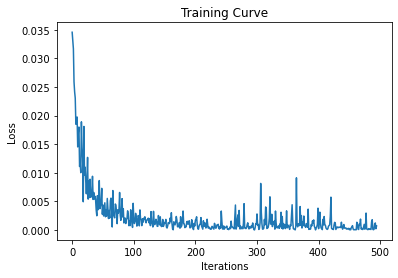

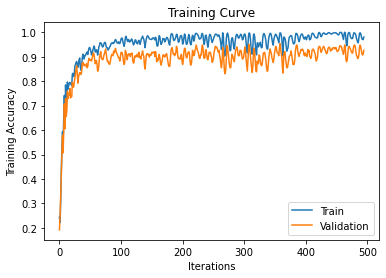

Final Training Accuracy: 0.9801548886737658
Final Validation Accuracy: 0.9260273972602739


In [ ]:
# Classification curve 1: batch size = 64, fc1 has 100 output channels (increase batch size)
use_cuda = True
model = Feature_Net()
batch_size = 64
lr = 0.01

if use_cuda and torch.cuda.is_available():
    model.cuda()
    print('CUDA is available!  Training on GPU ...')
else:
    print('CUDA is not available.  Training on CPU ...')
train2(model, dataset , batch_size=batch_size, learning_rate=lr, num_epochs=15,curve_name ='feature_1')

CUDA is available!  Training on GPU ...
Epoch 1: Train accuracy: 0.5128751210067763 |Validation accuracy: 0.47013698630136985
Epoch 2: Train accuracy: 0.748596321393998 |Validation accuracy: 0.7057534246575343
Epoch 3: Train accuracy: 0.8100677637947724 |Validation accuracy: 0.7780821917808219
Epoch 4: Train accuracy: 0.8381413359148112 |Validation accuracy: 0.798904109589041
Epoch 5: Train accuracy: 0.8667957405614715 |Validation accuracy: 0.823013698630137
Epoch 6: Train accuracy: 0.8972894482090996 |Validation accuracy: 0.8542465753424657
Epoch 7: Train accuracy: 0.9181994191674734 |Validation accuracy: 0.8739726027397261
Epoch 8: Train accuracy: 0.9331074540174249 |Validation accuracy: 0.8904109589041097
Epoch 9: Train accuracy: 0.9508228460793804 |Validation accuracy: 0.9145205479452055
Epoch 10: Train accuracy: 0.9599225556631172 |Validation accuracy: 0.9205479452054794
Epoch 11: Train accuracy: 0.9676669893514036 |Validation accuracy: 0.9221917808219178
Epoch 12: Train accuracy:

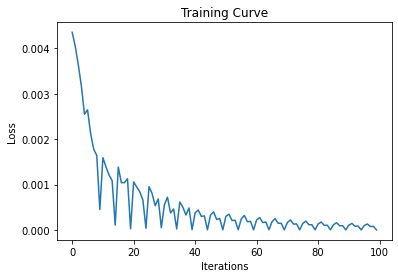

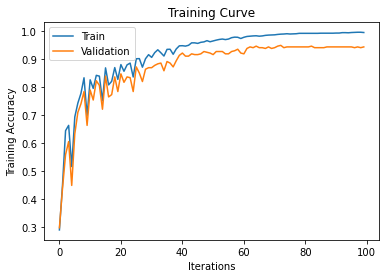

Final Training Accuracy: 0.9937076476282671
Final Validation Accuracy: 0.9424657534246575


In [ ]:
# Classification curve 2: batch size = 512, fc1 has 100 output channels (keep increasing batch size to 512)
use_cuda = True
model = Feature_Net()
batch_size = 512
lr = 0.01

if use_cuda and torch.cuda.is_available():
    model.cuda()
    print('CUDA is available!  Training on GPU ...')
else:
    print('CUDA is not available.  Training on CPU ...')
train2(model, dataset , batch_size=batch_size, learning_rate=lr, num_epochs=20,curve_name ='feature_2')

In [ ]:
class Feature_Net2(nn.Module): #decrease output channels of fc1
    def __init__(self):
        super(Feature_Net2, self).__init__()
        self.name = "Feature_Net2"
        self.fc1 = nn.Linear(256*6*6, 36)
        self.fc2 = nn.Linear(36, 9)

    def forward(self, x):
        x = x.view(-1, 256*6*6)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

CUDA is available!  Training on GPU ...
Epoch 1: Train accuracy: 0.7316553727008713 |Validation accuracy: 0.7077344573234984
Epoch 2: Train accuracy: 0.8934693573609351 |Validation accuracy: 0.8382718651211802
Epoch 3: Train accuracy: 0.8888822697147959 |Validation accuracy: 0.8330453108535302
Epoch 4: Train accuracy: 0.9199568098890465 |Validation accuracy: 0.864741833508957
Epoch 5: Train accuracy: 0.9408593342765657 |Validation accuracy: 0.8806743940990515
Epoch 6: Train accuracy: 0.951627075731626 |Validation accuracy: 0.8796628029504745
Epoch 7: Train accuracy: 0.957465187281257 |Validation accuracy: 0.8836670179135931
Epoch 8: Train accuracy: 0.978449623948172 |Validation accuracy: 0.9187355110642782
Epoch 9: Train accuracy: 0.9835654181249534 |Validation accuracy: 0.9117808219178083
Epoch 10: Train accuracy: 0.9933799985106858 |Validation accuracy: 0.9358904109589041
Epoch 11: Train accuracy: 0.9966788293990623 |Validation accuracy: 0.9441095890410962
Epoch 12: Train accuracy: 0

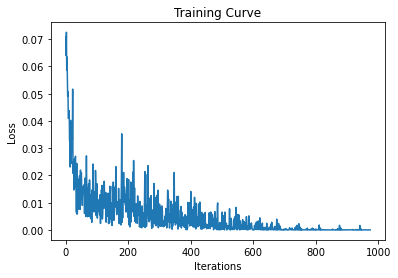

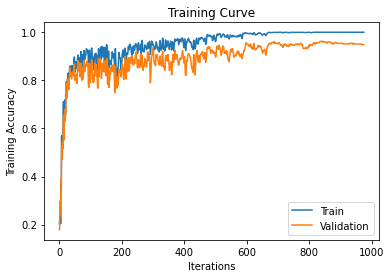

Final Training Accuracy: 0.9995159728944821
Final Validation Accuracy: 0.947945205479452


In [ ]:
# Classification curve 3: batch size = 32, fc1 has 36 output channels (decrease output channels of fc1)
use_cuda = True
model = Feature_Net2()
batch_size = 32
lr = 0.01

if use_cuda and torch.cuda.is_available():
    model.cuda()
    print('CUDA is available!  Training on GPU ...')
else:
    print('CUDA is not available.  Training on CPU ...')
train2(model, dataset , batch_size=batch_size, learning_rate=lr, num_epochs=15,curve_name ='feature_3')

In [ ]:
class Feature_Net3(nn.Module): #decrease channels
    def __init__(self):
        super(Feature_Net3, self).__init__()
        self.name = "Feature_Net3"
        self.fc1 = nn.Linear(256*6*6, 10)
        self.fc2 = nn.Linear(10, 9)

    def forward(self, x):
        x = x.view(-1, 256*6*6)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

CUDA is available!  Training on GPU ...
Epoch 1: Train accuracy: 0.48320798272395554 |Validation accuracy: 0.450663856691254
Epoch 2: Train accuracy: 0.6523419465336211 |Validation accuracy: 0.6249104320337199
Epoch 3: Train accuracy: 0.7398987266363838 |Validation accuracy: 0.7143097997892518
Epoch 4: Train accuracy: 0.7121230173505102 |Validation accuracy: 0.6815173867228664
Epoch 5: Train accuracy: 0.7906098741529524 |Validation accuracy: 0.7519915700737618
Epoch 6: Train accuracy: 0.8061806538089211 |Validation accuracy: 0.7546891464699683
Epoch 7: Train accuracy: 0.8254374860376795 |Validation accuracy: 0.7672075869336143
Epoch 8: Train accuracy: 0.8901035073348724 |Validation accuracy: 0.8288303477344572
Epoch 9: Train accuracy: 0.9053391913024054 |Validation accuracy: 0.8421074815595364
Epoch 10: Train accuracy: 0.9088316330329885 |Validation accuracy: 0.8406743940990519
Epoch 11: Train accuracy: 0.9266810633703176 |Validation accuracy: 0.8549631190727078
Epoch 12: Train accurac

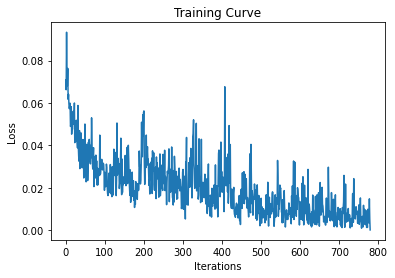

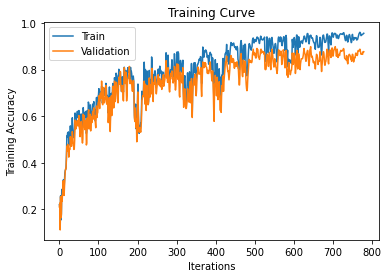

Final Training Accuracy: 0.9559535333978703
Final Validation Accuracy: 0.8767123287671232


In [ ]:
# Classification curve 4: batch size = 32, fc1 has 10 output channels (keep decreasing output channels of fc1 to 10)
use_cuda = True
model = Feature_Net3()
batch_size = 32
lr = 0.01

if use_cuda and torch.cuda.is_available():
    model.cuda()
    print('CUDA is available!  Training on GPU ...')
else:
    print('CUDA is not available.  Training on CPU ...')
train2(model, dataset , batch_size=batch_size, learning_rate=lr, num_epochs=12,curve_name ='feature_4')

### Part (d) - 2 pt
Report the test accuracy of your best model. How does the test accuracy compare to Part 3(d) without transfer learning?

In [ ]:
best_model = Feature_Net2()
state = torch.load('model_Feature_Net2_curvename_feature_3_epoch14')
best_model.load_state_dict(state)

<All keys matched successfully>

In [ ]:
test_loader  = test_loading(test_dataset,batch_size=32)
test_features,test_labels = get_features(test_loader)
test_accuracy = get_accuracy2(best_model.cuda(),test_loader,test_features,test_labels) 
print('Test accuracy of best model is:', test_accuracy)

Test accuracy of best model is: 0.991869918699187


The accuracy of part4(d) is higher than the accuracy of partc(d) without transfer learning.

### Part 5. Testing on New Data [10 pt]
As a final step in testing we will be revisiting the sample images that you had collected and submitted with your lab. These sample images should be untouched and will be used to demonstrate how well your model works at identifying your hand guestures. 



### Part (a) - 3 pt
Load and process the hand gesture images you had collected so that they can easily be evaulated by your model.

In [ ]:
#loading Data
small_data = ImageFolder('li_1007508724',transform=transform)

#Loader
small_loader = torch.utils.data.DataLoader(small_data, batch_size=32)

#Features
small_features,small_labels = get_features(small_loader)

### Part (b) - 7 pt
Using the best transfer learning model developed in Part 4. Report the test accuracy on your sample images and how it compares to the test accuracy obtained in Part 4(d)? How well did your model do for the different hand guestures? Provide an explanation for why you think your model performed the way it did?  

This question will also be evaluated on the overal performance achieved.

In [ ]:
#Accuracy score
small_accuracy = get_accuracy2(best_model.cuda(),small_loader,small_features,small_labels)

In [ ]:
print('New data accuracy',small_accuracy)

New data accuracy 1.0


My example image has an accuracy of 1.0 and the part4(d) test data has an accuracy of 0.992. The difference between them is very close. I think the reason the test images are not as accurate as my data is that some images are not acceptable. Some of them put their entire arm in the image, and some turn their hands a few angles, which can lead to misclassification.

### Saving to HTML
Detailed instructions for saving to HTML can be found <a href="https://stackoverflow.com/questions/53460051/convert-ipynb-notebook-to-html-in-google-colab/64487858#64487858">here</a>. Provided below are a summary of the instructions:

(1) download your ipynb file by clicking on File->Download.ipynb

(2) reupload your file to the temporary Google Colab storage (you can access the temporary storage from the tab to the left)

(3) run the following:

In [4]:
%%shell
jupyter nbconvert --to html LAB_2_Hand_Gesture_Recognition.ipynb

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `jupyter nbconvert --to html LAB_2_Hand_Gesture_Recognition_(WL).ipynb'


CalledProcessError: ignored

(4) the html file will be available for download in the temporary Google Colab storage

(5) review the html file and make sure all the results are visible before submitting your assignment to Quercus